In [1]:
%reload_kedro

2023-05-04 14:30:56,822 - kedro.extras.extensions.ipython - INFO - No path argument was provided. Using: /Users/gpalazzo/Desktop/dev/crypto_msc_thesis
2023-05-04 14:30:57,526 - kedro.framework.session.store - INFO - `read()` not implemented for `BaseSessionStore`. Assuming empty store.
2023-05-04 14:30:58,266 - kedro.extras.extensions.ipython - INFO - ** Kedro project crypto_thesis
2023-05-04 14:30:58,267 - kedro.extras.extensions.ipython - INFO - Defined global variable `context`, `session`, `catalog` and `pipelines`


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import quantstats as qs
import seaborn as sns

## XGBoost

### Operations Profit over Time

In [4]:
df_portf_pnl = catalog.load("xgboost_portfolio_pnl")

2023-05-04 14:30:59,417 - kedro.io.data_catalog - INFO - Loading data from `xgboost_portfolio_pnl` (ParquetDataSet)...


In [5]:
df_ops = df_portf_pnl[["close_time", "op_full_profit"]] \
                .sort_values(by="close_time", ascending=True) \
                .reset_index(drop=True)

accum_mean = []
accum_std = []

for i in range(len(df_ops.index)):
    _accum_mean = df_ops.iloc[0:i+1].op_full_profit.mean()
    _accum_std = df_ops.iloc[0:i+1].op_full_profit.std(ddof=1)
    
    accum_mean.append(_accum_mean)
    accum_std.append(_accum_std)
    
# accum_std[0] = 0.0 #first data point has std as NaN, so substitute by 0

df_ops.loc[:, "mean"] = accum_mean
df_ops.loc[:, "std"] = accum_std

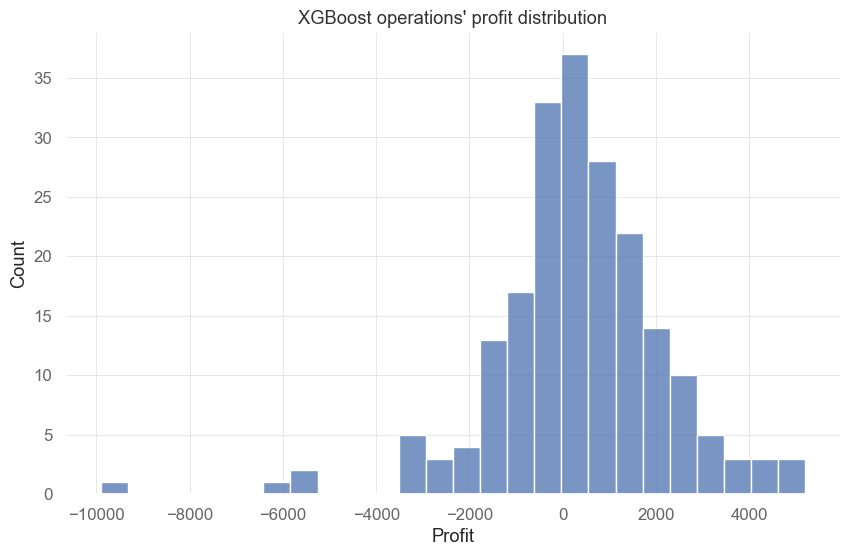

In [6]:
df = df_ops[["close_time", "op_full_profit"]] \
            .rename(columns={"close_time": "Date",
                            "op_full_profit": "Profit"}) \
            .set_index("Date") \
            .sort_index()

plot = sns.histplot(data=df,
             legend=None,
             x="Profit",
            ) \
            .set(title="XGBoost operations' profit distribution")

plt.savefig("/Users/gpalazzo/Desktop/fig_xgboost_ops_profit.png")

<Axes: title={'center': "Operations' Profit std over time"}, xlabel='Date', ylabel='Profit Std'>

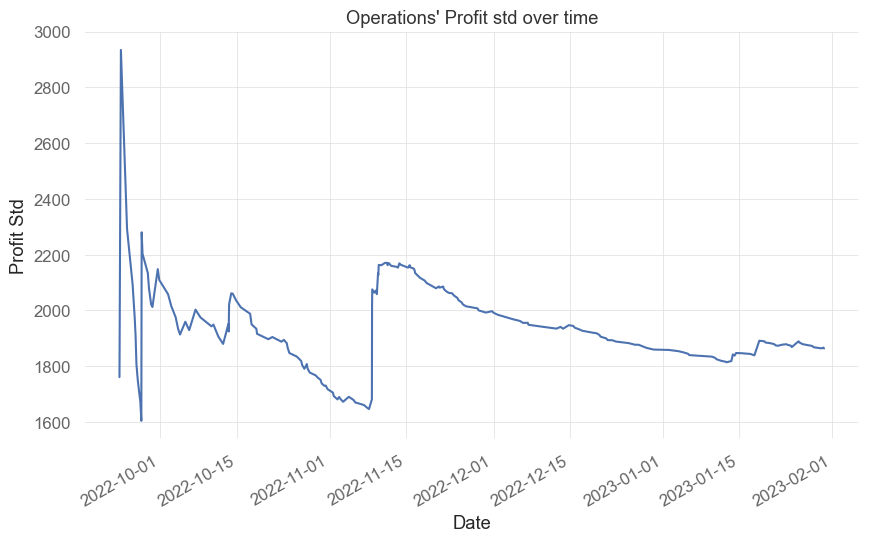

In [7]:
df_ops[["close_time", "std"]].set_index("close_time").sort_index(). \
                plot(title="Operations' Profit std over time", 
                     legend=None,
                     xlabel="Date",
                     ylabel="Profit Std"
                    )

<Axes: title={'center': "Operations' Profit mean over time"}, xlabel='Date', ylabel='Profit Mean'>

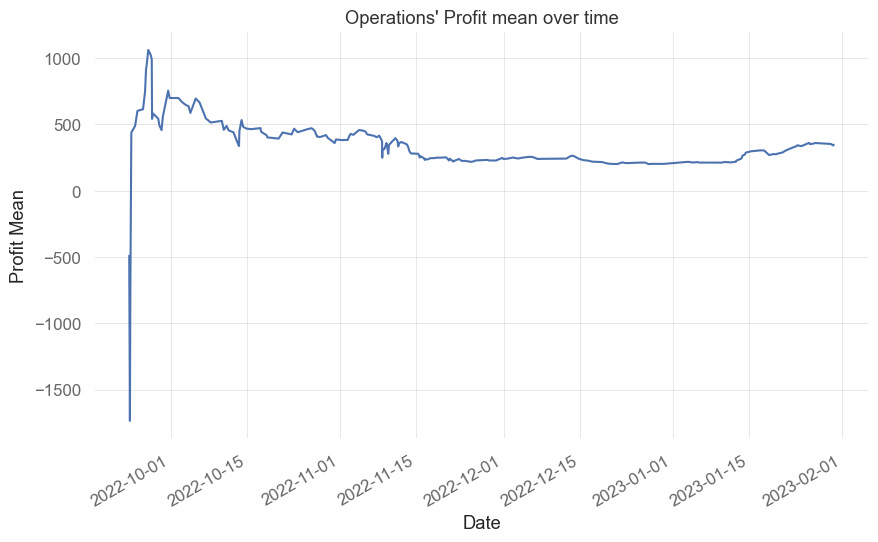

In [8]:
df_ops[["close_time", "mean"]].set_index("close_time").sort_index(). \
                plot(title="Operations' Profit mean over time", 
                     legend=None,
                     xlabel="Date",
                     ylabel="Profit Mean"
                    )

## LSTM

### Operations Profit over Time

In [9]:
df_portf_pnl = catalog.load("lstm_portfolio_pnl")

2023-05-04 14:31:01,053 - kedro.io.data_catalog - INFO - Loading data from `lstm_portfolio_pnl` (ParquetDataSet)...


In [10]:
df_ops = df_portf_pnl[["close_time", "op_full_profit"]] \
                .sort_values(by="close_time", ascending=True) \
                .reset_index(drop=True)

accum_mean = []
accum_std = []

for i in range(len(df_ops.index)):
    _accum_mean = df_ops.iloc[0:i+1].op_full_profit.mean()
    _accum_std = df_ops.iloc[0:i+1].op_full_profit.std(ddof=1)
    
    accum_mean.append(_accum_mean)
    accum_std.append(_accum_std)
    
# accum_std[0] = 0.0 #first data point has std as NaN, so substitute by 0

df_ops.loc[:, "mean"] = accum_mean
df_ops.loc[:, "std"] = accum_std

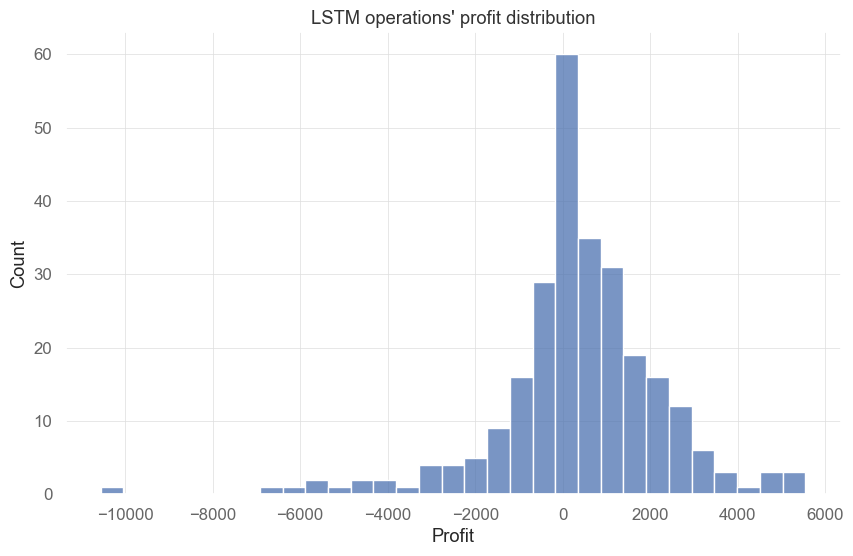

In [11]:
df = df_ops[["close_time", "op_full_profit"]] \
            .rename(columns={"close_time": "Date",
                            "op_full_profit": "Profit"}) \
            .set_index("Date") \
            .sort_index()

plot = sns.histplot(data=df,
             legend=None,
             x="Profit",
            ) \
            .set(title="LSTM operations' profit distribution")

plt.savefig("/Users/gpalazzo/Desktop/fig_lstm_ops_profit.png")

<Axes: title={'center': "Operations' Profit std over time"}, xlabel='Date', ylabel='Profit Std'>

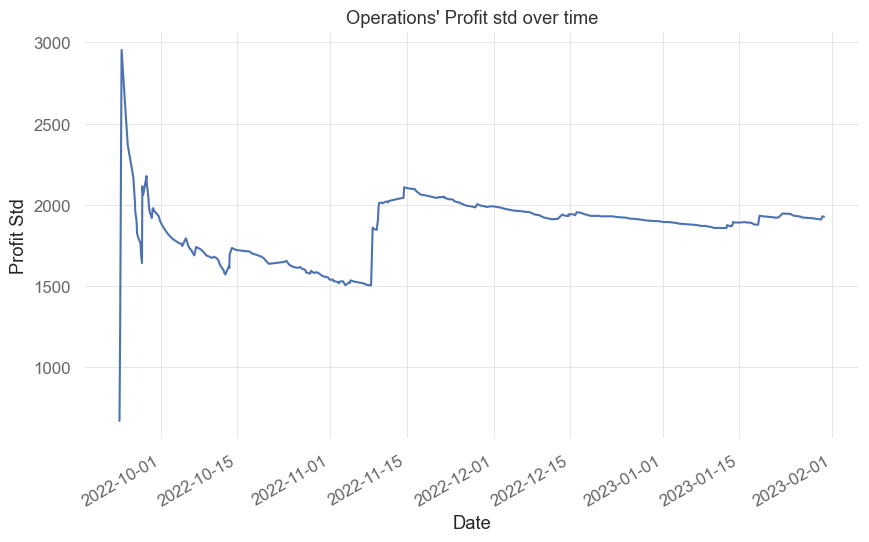

In [12]:
df_ops[["close_time", "std"]].set_index("close_time").sort_index(). \
                plot(title="Operations' Profit std over time", 
                     legend=None,
                     xlabel="Date",
                     ylabel="Profit Std"
                    )

<Axes: title={'center': "Operations' Profit mean over time"}, xlabel='Date', ylabel='Profit Mean'>

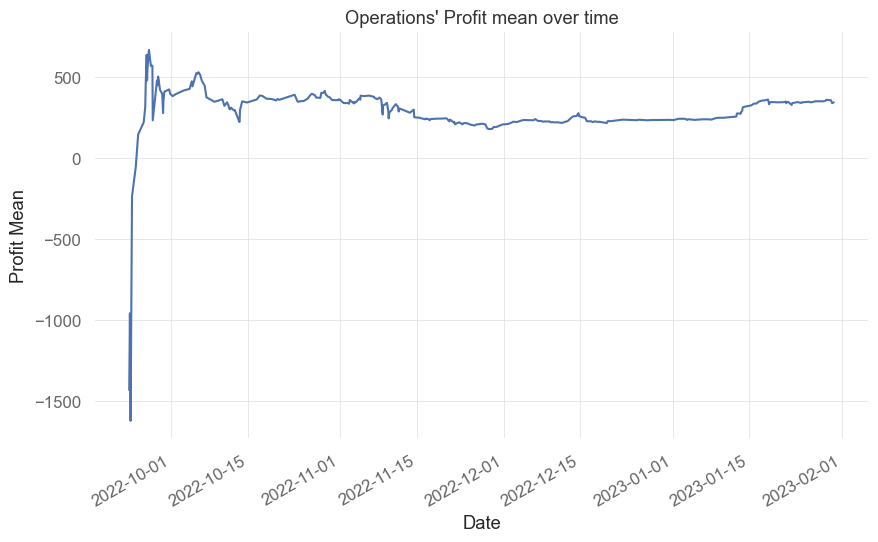

In [13]:
df_ops[["close_time", "mean"]].set_index("close_time").sort_index(). \
                plot(title="Operations' Profit mean over time", 
                     legend=None,
                     xlabel="Date",
                     ylabel="Profit Mean"
                    )

## LogReg

### Operations Profit over Time

In [14]:
df_portf_pnl = catalog.load("logreg_portfolio_pnl")

2023-05-04 14:31:02,638 - kedro.io.data_catalog - INFO - Loading data from `logreg_portfolio_pnl` (ParquetDataSet)...


In [15]:
df_ops = df_portf_pnl[["close_time", "op_full_profit"]] \
                .sort_values(by="close_time", ascending=True) \
                .reset_index(drop=True)

accum_mean = []
accum_std = []

for i in range(len(df_ops.index)):
    _accum_mean = df_ops.iloc[0:i+1].op_full_profit.mean()
    _accum_std = df_ops.iloc[0:i+1].op_full_profit.std(ddof=1)
    
    accum_mean.append(_accum_mean)
    accum_std.append(_accum_std)
    
# accum_std[0] = 0.0 #first data point has std as NaN, so substitute by 0

df_ops.loc[:, "mean"] = accum_mean
df_ops.loc[:, "std"] = accum_std

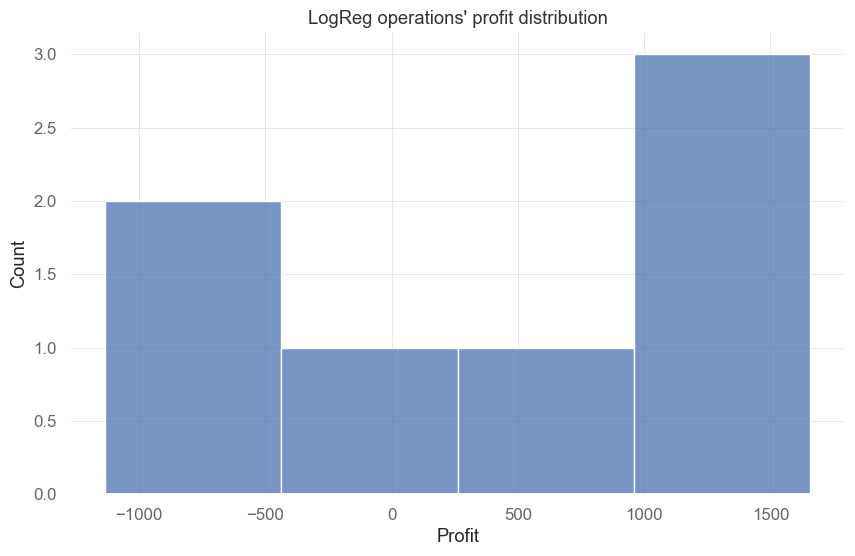

In [16]:
df = df_ops[["close_time", "op_full_profit"]] \
            .rename(columns={"close_time": "Date",
                            "op_full_profit": "Profit"}) \
            .set_index("Date") \
            .sort_index()

plot = sns.histplot(data=df,
             legend=None,
             x="Profit",
            ) \
            .set(title="LogReg operations' profit distribution")

plt.savefig("/Users/gpalazzo/Desktop/fig_logreg_ops_profit.png")

<Axes: title={'center': "Operations' Profit std over time"}, xlabel='Date', ylabel='Profit Std'>

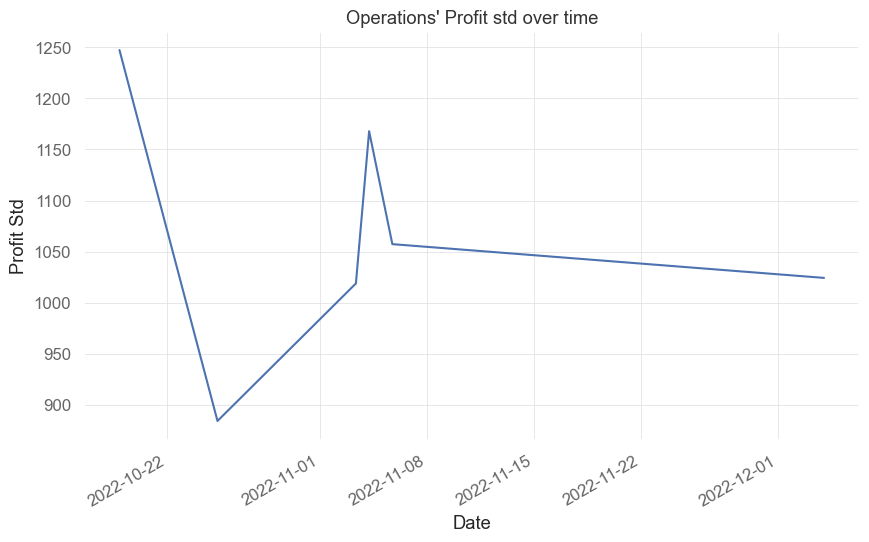

In [17]:
df_ops[["close_time", "std"]].set_index("close_time").sort_index(). \
                plot(title="Operations' Profit std over time", 
                     legend=None,
                     xlabel="Date",
                     ylabel="Profit Std"
                    )

<Axes: title={'center': "Operations' Profit mean over time"}, xlabel='Date', ylabel='Profit Mean'>

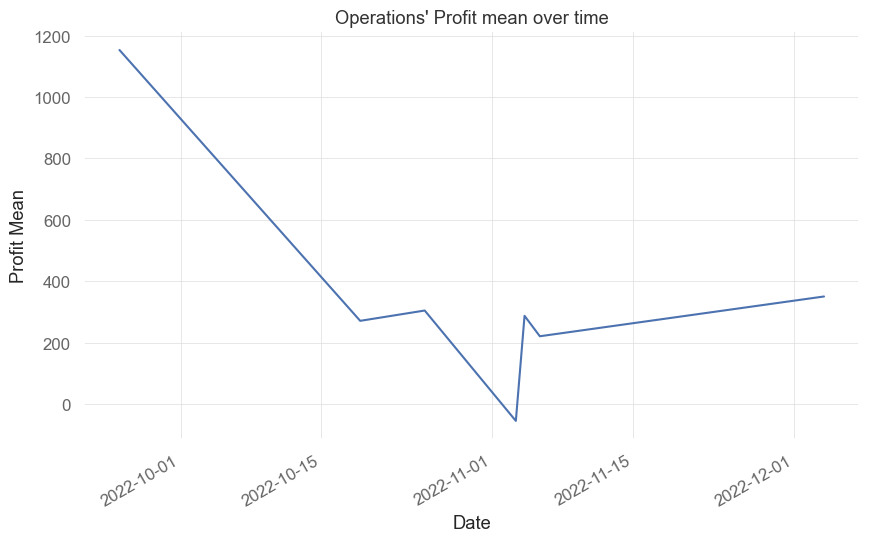

In [18]:
df_ops[["close_time", "mean"]].set_index("close_time").sort_index(). \
                plot(title="Operations' Profit mean over time", 
                     legend=None,
                     xlabel="Date",
                     ylabel="Profit Mean"
                    )

## XGBoost

### Portfolio overall metrics - Part 1

In [19]:
df_portf_metr = catalog.load("xgboost_portfolio_metrics")
df_portf_metr.loc[:, "model"] = "xgboost"
df_portf_metr

2023-05-04 14:31:03,692 - kedro.io.data_catalog - INFO - Loading data from `xgboost_portfolio_metrics` (ParquetDataSet)...


,nominal_profit,consecutive_wins,consecutive_losses,model
0,70507.651388,11,6,xgboost


### Portfolio overall metrics - Part 2

In [20]:
df_portf_pnl = catalog.load("xgboost_portfolio_pnl")

df_portf_pnl.loc[:, "logret_pos"] = np.log(1 + df_portf_pnl["pctchg_pos"])

df_logret = df_portf_pnl[["close_time", "pctchg_pos", "logret_pos"]] \
                        .rename(columns={"close_time": "date"}) \
                        .set_index("date").sort_index()

df_logret.loc[:, "logret_accum"] = df_logret["logret_pos"].cumsum()
df_logret.loc[:, "pctchg_accum"] = np.exp(df_logret["logret_accum"]) - 1

df_logret = df_logret[["pctchg_pos", "pctchg_accum"]] \
                    .rename(columns={"pctchg_pos": "portf_pctchg_pos",
                                   "pctchg_accum": "portf_pctchg_accum"})

df_logret.index = pd.to_datetime(df_logret.index)

2023-05-04 14:31:03,708 - kedro.io.data_catalog - INFO - Loading data from `xgboost_portfolio_pnl` (ParquetDataSet)...


In [21]:
qs.reports.metrics(returns=df_logret["portf_pctchg_pos"], periods_per_year=360)

                    Strategy
------------------  ----------
Start Period        2022-09-23
End Period          2023-01-30
Risk-Free Rate      0.0%
Time in Market      100.0%

Cumulative Return   47.01%
CAGR﹪              197.48%

Sharpe              3.53
Prob. Sharpe Ratio  99.24%
Sortino             5.28
Sortino/√2          3.73
Omega               1.71

Max Drawdown        -7.44%
Longest DD Days     31

Gain/Pain Ratio     1.34
Gain/Pain (1M)      -

Payoff Ratio        1.11
Profit Factor       1.71
Common Sense Ratio  2.01
CPC Index           1.15
Tail Ratio          1.17
Outlier Win Ratio   3.64
Outlier Loss Ratio  4.25

MTD                 20.65%
3M                  26.46%
6M                  47.01%
YTD                 20.65%
1Y                  47.01%
3Y (ann.)           197.48%
5Y (ann.)           197.48%
10Y (ann.)          197.48%
All-time (ann.)     197.48%

Avg. Drawdown       -2.11%
Avg. Drawdown Days  5
Recovery Factor     6.32
Ulcer Index         0.03
Serenity Index      

In [22]:
"""
ESSE GRÁFICO NÃO TEM MAIS PORQUE O HORIZONTE DO BENCHMARK É DIFERENTE
AGORA ESTOU FAZENDO UM ESFORÇO PARA PADRONIZAÇÃO DO BENCHMARK ÚNICO PARA TODOS OS MODELOS

PENSAR DEPOIS SE TEM UMA FORMA DE JUNTAR OS 2 PORQUE ESSE GRÁFICO PARECIA INTERESSANTE
"""

# plot = df[["portf_pctchg_accum", "benchm_pctchg_accum"]] \
#             .rename(columns={"portf_pctchg_accum": "Strategy",
#                             "benchm_pctchg_accum": "Benchmark"}) \
#             .plot()

# plt.xlabel("Date")
# plt.ylabel("Cumulative Returns")

# fig = plot.get_figure()
# fig.savefig("/Users/gpalazzo/Desktop/fig_xgboost_portf_vs_benchmk_rets.png")

'\nESSE GRÁFICO NÃO TEM MAIS PORQUE O HORIZONTE DO BENCHMARK É DIFERENTE\nAGORA ESTOU FAZENDO UM ESFORÇO PARA PADRONIZAÇÃO DO BENCHMARK ÚNICO PARA TODOS OS MODELOS\n\nPENSAR DEPOIS SE TEM UMA FORMA DE JUNTAR OS 2 PORQUE ESSE GRÁFICO PARECIA INTERESSANTE\n'

## LSTM

### Portfolio overall metrics - Part 1

In [23]:
df_portf_metr = catalog.load("lstm_portfolio_metrics")
df_portf_metr.loc[:, "model"] = "lstm"
df_portf_metr

2023-05-04 14:31:04,169 - kedro.io.data_catalog - INFO - Loading data from `lstm_portfolio_metrics` (ParquetDataSet)...


,nominal_profit,consecutive_wins,consecutive_losses,model
0,91706.718623,13,7,lstm


### Portfolio overall metrics - Part 2

In [24]:
df_portf_pnl = catalog.load("lstm_portfolio_pnl")

df_portf_pnl.loc[:, "logret_pos"] = np.log(1 + df_portf_pnl["pctchg_pos"])

df_logret = df_portf_pnl[["close_time", "pctchg_pos", "logret_pos"]] \
                        .rename(columns={"close_time": "date"}) \
                        .set_index("date").sort_index()

df_logret.loc[:, "logret_accum"] = df_logret["logret_pos"].cumsum()
df_logret.loc[:, "pctchg_accum"] = np.exp(df_logret["logret_accum"]) - 1

df_logret = df_logret[["pctchg_pos", "pctchg_accum"]] \
                    .rename(columns={"pctchg_pos": "portf_pctchg_pos",
                                   "pctchg_accum": "portf_pctchg_accum"})

df_logret.index = pd.to_datetime(df_logret.index)

2023-05-04 14:31:04,182 - kedro.io.data_catalog - INFO - Loading data from `lstm_portfolio_pnl` (ParquetDataSet)...


In [25]:
qs.reports.metrics(returns=df_logret["portf_pctchg_pos"], periods_per_year=360)

                    Strategy
------------------  ----------
Start Period        2022-09-23
End Period          2023-01-30
Risk-Free Rate      0.0%
Time in Market      100.0%

Cumulative Return   61.14%
CAGR﹪              285.71%

Sharpe              3.41
Prob. Sharpe Ratio  99.62%
Sortino             4.95
Sortino/√2          3.5
Omega               1.7

Max Drawdown        -7.21%
Longest DD Days     35

Gain/Pain Ratio     1.84
Gain/Pain (1M)      -

Payoff Ratio        1.07
Profit Factor       1.7
Common Sense Ratio  1.64
CPC Index           1.11
Tail Ratio          0.97
Outlier Win Ratio   3.64
Outlier Loss Ratio  4.48

MTD                 20.89%
3M                  31.55%
6M                  61.14%
YTD                 20.89%
1Y                  61.14%
3Y (ann.)           285.71%
5Y (ann.)           285.71%
10Y (ann.)          285.71%
All-time (ann.)     285.71%

Avg. Drawdown       -1.66%
Avg. Drawdown Days  4
Recovery Factor     8.48
Ulcer Index         0.03
Serenity Index      5.2

In [26]:
"""
ESSE GRÁFICO NÃO TEM MAIS PORQUE O HORIZONTE DO BENCHMARK É DIFERENTE
AGORA ESTOU FAZENDO UM ESFORÇO PARA PADRONIZAÇÃO DO BENCHMARK ÚNICO PARA TODOS OS MODELOS

PENSAR DEPOIS SE TEM UMA FORMA DE JUNTAR OS 2 PORQUE ESSE GRÁFICO PARECIA INTERESSANTE
"""

# plot = df[["portf_pctchg_accum", "benchm_pctchg_accum"]] \
#             .rename(columns={"portf_pctchg_accum": "Strategy",
#                             "benchm_pctchg_accum": "Benchmark"}) \
#             .plot()

# plt.xlabel("Date")
# plt.ylabel("Cumulative Returns")

# fig = plot.get_figure()
# fig.savefig("/Users/gpalazzo/Desktop/fig_lstm_portf_vs_benchmk_rets.png")

'\nESSE GRÁFICO NÃO TEM MAIS PORQUE O HORIZONTE DO BENCHMARK É DIFERENTE\nAGORA ESTOU FAZENDO UM ESFORÇO PARA PADRONIZAÇÃO DO BENCHMARK ÚNICO PARA TODOS OS MODELOS\n\nPENSAR DEPOIS SE TEM UMA FORMA DE JUNTAR OS 2 PORQUE ESSE GRÁFICO PARECIA INTERESSANTE\n'

## LogReg

### Portfolio overall metrics - Part 1

In [27]:
df_portf_metr = catalog.load("logreg_portfolio_metrics")
df_portf_metr.loc[:, "model"] = "LogReg"
df_portf_metr

2023-05-04 14:31:04,549 - kedro.io.data_catalog - INFO - Loading data from `logreg_portfolio_metrics` (ParquetDataSet)...


,nominal_profit,consecutive_wins,consecutive_losses,model
0,2453.213862,1,1,LogReg


### Portfolio overall metrics - Part 2

In [28]:
df_portf_pnl = catalog.load("logreg_portfolio_pnl")

df_portf_pnl.loc[:, "logret_pos"] = np.log(1 + df_portf_pnl["pctchg_pos"])

df_logret = df_portf_pnl[["close_time", "pctchg_pos", "logret_pos"]] \
                        .rename(columns={"close_time": "date"}) \
                        .set_index("date").sort_index()

df_logret.loc[:, "logret_accum"] = df_logret["logret_pos"].cumsum()
df_logret.loc[:, "pctchg_accum"] = np.exp(df_logret["logret_accum"]) - 1

df_logret = df_logret[["pctchg_pos", "pctchg_accum"]] \
                    .rename(columns={"pctchg_pos": "portf_pctchg_pos",
                                   "pctchg_accum": "portf_pctchg_accum"})

df_logret.index = pd.to_datetime(df_logret.index)

2023-05-04 14:31:04,566 - kedro.io.data_catalog - INFO - Loading data from `logreg_portfolio_pnl` (ParquetDataSet)...


In [29]:
qs.reports.metrics(returns=df_logret["portf_pctchg_pos"], periods_per_year=360)

                    Strategy
------------------  ----------
Start Period        2022-09-24
End Period          2022-12-03
Risk-Free Rate      0.0%
Time in Market      100.0%

Cumulative Return   1.64%
CAGR﹪              8.83%

Sharpe              6.52
Prob. Sharpe Ratio  79.96%
Sortino             13.72
Sortino/√2          9.7
Omega               2.33

Max Drawdown        -0.91%
Longest DD Days     28

Gain/Pain Ratio     1.33
Gain/Pain (1M)      10.42

Payoff Ratio        1.75
Profit Factor       2.33
Common Sense Ratio  3.62
CPC Index           2.33
Tail Ratio          1.55
Outlier Win Ratio   1.51
Outlier Loss Ratio  1.78

MTD                 0.75%
3M                  1.64%
6M                  1.64%
YTD                 1.64%
1Y                  1.64%
3Y (ann.)           8.83%
5Y (ann.)           8.83%
10Y (ann.)          8.83%
All-time (ann.)     8.83%

Avg. Drawdown       -0.49%
Avg. Drawdown Days  22
Recovery Factor     1.8
Ulcer Index         0.0
Serenity Index      3.49


In [30]:
"""
ESSE GRÁFICO NÃO TEM MAIS PORQUE O HORIZONTE DO BENCHMARK É DIFERENTE
AGORA ESTOU FAZENDO UM ESFORÇO PARA PADRONIZAÇÃO DO BENCHMARK ÚNICO PARA TODOS OS MODELOS

PENSAR DEPOIS SE TEM UMA FORMA DE JUNTAR OS 2 PORQUE ESSE GRÁFICO PARECIA INTERESSANTE
"""

# plot = df[["portf_pctchg_accum", "benchm_pctchg_accum"]] \
#             .rename(columns={"portf_pctchg_accum": "Strategy",
#                             "benchm_pctchg_accum": "Benchmark"}) \
#             .plot()

# plt.xlabel("Date")
# plt.ylabel("Cumulative Returns")

# fig = plot.get_figure()
# fig.savefig("/Users/gpalazzo/Desktop/fig_logreg_portf_vs_benchmk_rets.png")

'\nESSE GRÁFICO NÃO TEM MAIS PORQUE O HORIZONTE DO BENCHMARK É DIFERENTE\nAGORA ESTOU FAZENDO UM ESFORÇO PARA PADRONIZAÇÃO DO BENCHMARK ÚNICO PARA TODOS OS MODELOS\n\nPENSAR DEPOIS SE TEM UMA FORMA DE JUNTAR OS 2 PORQUE ESSE GRÁFICO PARECIA INTERESSANTE\n'